In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [4]:
train.isnull().sum().sum()

0

In [5]:
X = train.drop(["id", "target"], axis=1)
y = train["target"]
X_test = test.drop(["id"], axis=1)

In [6]:
from sklearn import model_selection
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(49502, 93) (49502,)
(12376, 93) (12376,)


In [7]:
from sklearn import ensemble
from sklearn import metrics

In [8]:
model1 = ensemble.RandomForestClassifier()
model1.fit(X_train, y_train)

pred = model1.predict(X_valid)
accuracy = metrics.accuracy_score(y_valid, pred)

print(accuracy)

0.8136716224951519


In [9]:
import lightgbm as lgb

In [10]:
model2 = lgb.LGBMClassifier()
model2.fit(X_train, y_train)

pred = model2.predict(X_valid)
accuracy = metrics.accuracy_score(y_valid, pred)

print(accuracy)

0.8207013574660633


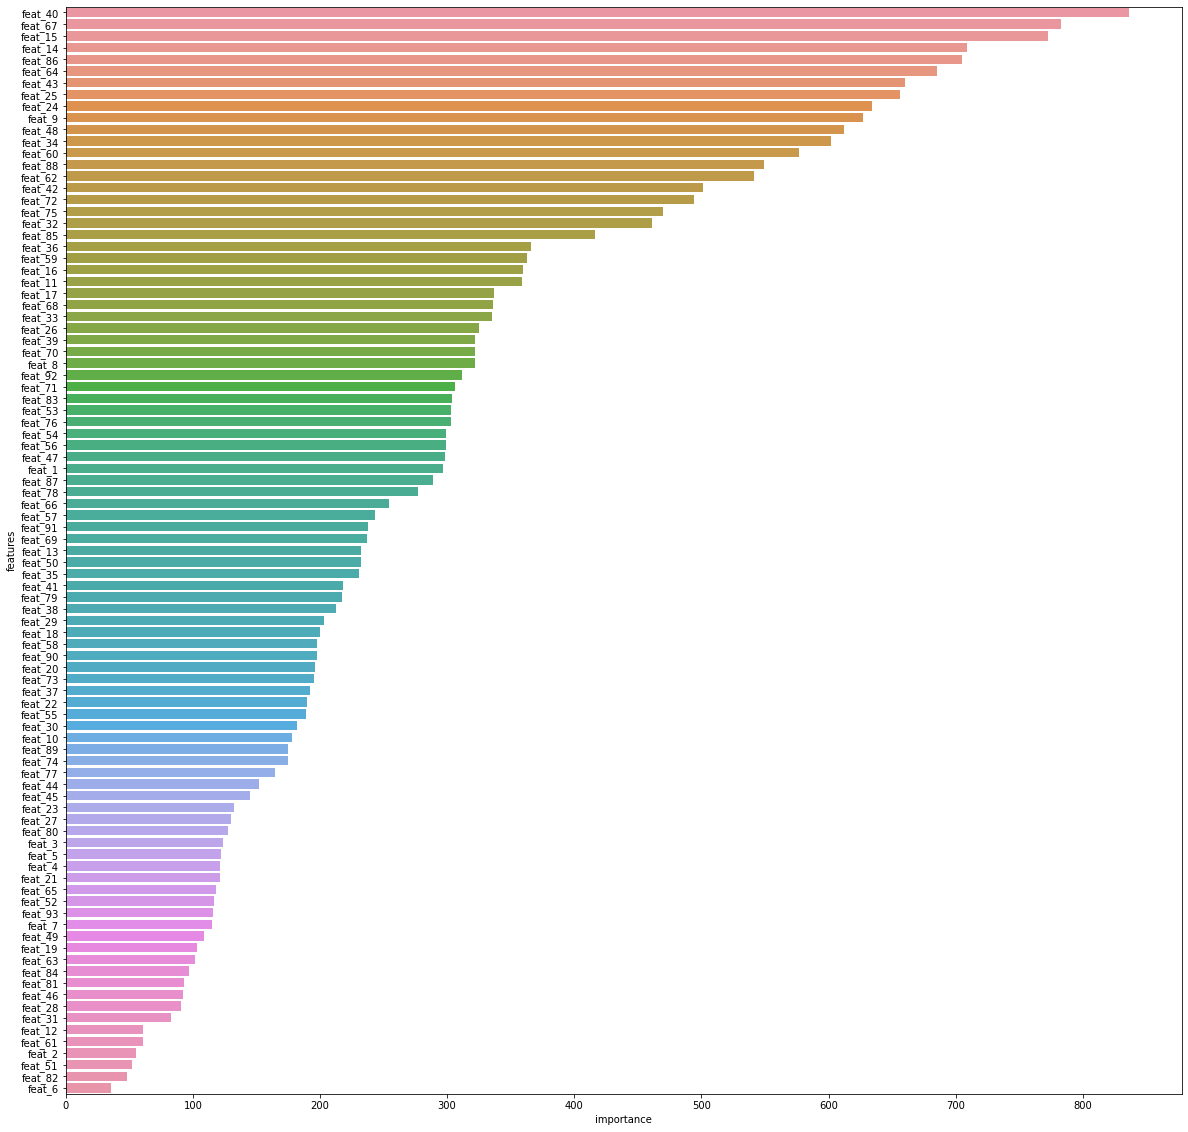

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

importance = pd.DataFrame()
importance["features"] = X_train.columns
importance["importance"] = model2.feature_importances_
importance = importance.sort_values("importance", ascending=False)

plt.figure(figsize=(20,20))
sns.barplot(x="importance", y="features", data=importance);

100%|===================| 49494/49502 [22:57<00:00]        

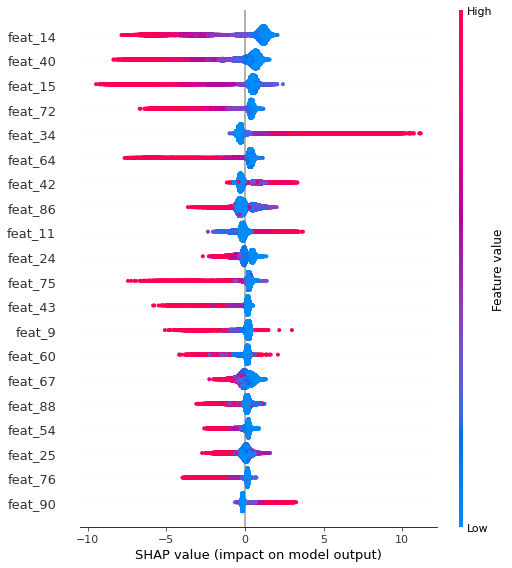

In [25]:
import shap

explainer = shap.TreeExplainer(model2, X_train)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train)

In [11]:
from sklearn import neighbors

neigh = neighbors.NearestNeighbors(
    n_neighbors=2, 
    n_jobs=-1,
)
neigh.fit(X)
    
dists, _ = neigh.kneighbors(
    X=X,
    n_neighbors=2,
)

neigh_df = pd.DataFrame()
neigh_df["sum_dist"] = dists.sum(axis=1)
neigh_df["mean_dist"] = dists.mean(axis=1)
neigh_df["max_dist"] = dists.max(axis=1)
neigh_df["min_dist"] = dists.min(axis=1)

print(neigh_df.shape)
neigh_df.head(3)

(61878, 4)


,sum_dist,mean_dist,max_dist,min_dist
0,4.123106,2.061553,4.123106,0.0
1,3.605551,1.802776,3.605551,0.0
2,2.828427,1.414214,2.828427,0.0


In [13]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X)
pca_2D = pca.fit_transform(X)

pca_df = pd.DataFrame()
pca_df["pca_2D_0"] = pca_2D[:, 0]
pca_df["pca_2D_1"] = pca_2D[:, 1]

print(pca_df.shape)
pca_df.head(3)

(61878, 2)


,pca_2D_0,pca_2D_1
0,0.683549,-1.456844
1,-2.645992,-1.893253
2,-1.881299,-3.111416


In [14]:
from sklearn import manifold

tsne = manifold.TSNE(n_components=3, random_state=0)
tsne_3D = tsne.fit_transform(X)

tsne_df = pd.DataFrame()
tsne_df["tsne_3D_0"] = tsne_3D[:, 0]
tsne_df["tsne_3D_1"] = tsne_3D[:, 1]
tsne_df["tsne_3D_2"] = tsne_3D[:, 2]

print(tsne_df.shape)
tsne_df.head(3)

(61878, 3)


,tsne_3D_0,tsne_3D_1,tsne_3D_2
0,-10.142106,5.722496,12.466566
1,3.910205,-5.805827,0.437641
2,5.347448,-6.124020,7.851460


In [17]:
neigh_tsne = neighbors.NearestNeighbors(
    n_neighbors=2, 
    n_jobs=-1,
)
neigh.fit(tsne_df)
    
dists, _ = neigh.kneighbors(
    X=tsne_df,
    n_neighbors=2,
)

tsne_neigh_df = pd.DataFrame()
tsne_neigh_df["tsne_neigh_0"] = dists.sum(axis=1)
tsne_neigh_df["tsne_neigh_1"] = dists.mean(axis=1)

print(tsne_neigh_df.shape)
tsne_neigh_df.head(3)

(61878, 2)


,tsne_neigh_0,tsne_neigh_1
0,0.138982,0.069491
1,0.140156,0.070078
2,0.284404,0.142202


In [24]:
from sklearn import feature_extraction

vec = feature_extraction.text.TfidfVectorizer()
tfidf = vec.fit_transform(X).toarray()

neigh_tsne = neighbors.NearestNeighbors(
    n_neighbors=2, 
    n_jobs=-1,
)
neigh.fit(tfidf)
    
dists, _ = neigh.kneighbors(
    X=tfidf,
    n_neighbors=2,
)

tfidf_neigh_df = pd.DataFrame()
tfidf_neigh_df["tfidf_neigh_0"] = dists.sum(axis=1)
tfidf_neigh_df["tfidf_neigh_1"] = dists.mean(axis=1)

print(tfidf_neigh_df.shape)
tfidf_neigh_df.head(3)

(93, 2)


,tfidf_neigh_0,tfidf_neigh_1
0,1.414214,0.707107
1,1.414214,0.707107
2,1.414214,0.707107


In [28]:
all_data = pd.concat([
    X, 
    neigh_df, 
    pca_df, 
    tsne_neigh_df,
], axis=1)

print(all_data.shape)
all_data.head(3)

(61878, 101)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_92,feat_93,sum_dist,mean_dist,max_dist,min_dist,pca_2D_0,pca_2D_1,tsne_neigh_0,tsne_neigh_1
0,1,0,0,0,0,0,0,0,0,0,...,0,0,4.123106,2.061553,4.123106,0.0,0.683549,-1.456844,0.138982,0.069491
1,0,0,0,0,0,0,0,1,0,0,...,0,0,3.605551,1.802776,3.605551,0.0,-2.645992,-1.893253,0.140156,0.070078
2,0,0,0,0,0,0,0,1,0,0,...,0,0,2.828427,1.414214,2.828427,0.0,-1.881299,-3.111416,0.284404,0.142202


In [30]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(
    all_data, 
    y, 
    test_size=0.2,
)
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(49502, 101) (49502,)
(12376, 101) (12376,)


In [31]:
model3 = lgb.LGBMClassifier()
model3.fit(X_train, y_train)

pred = model3.predict(X_valid)
accuracy = metrics.accuracy_score(y_valid, pred)

print(accuracy)

0.8124595992243051


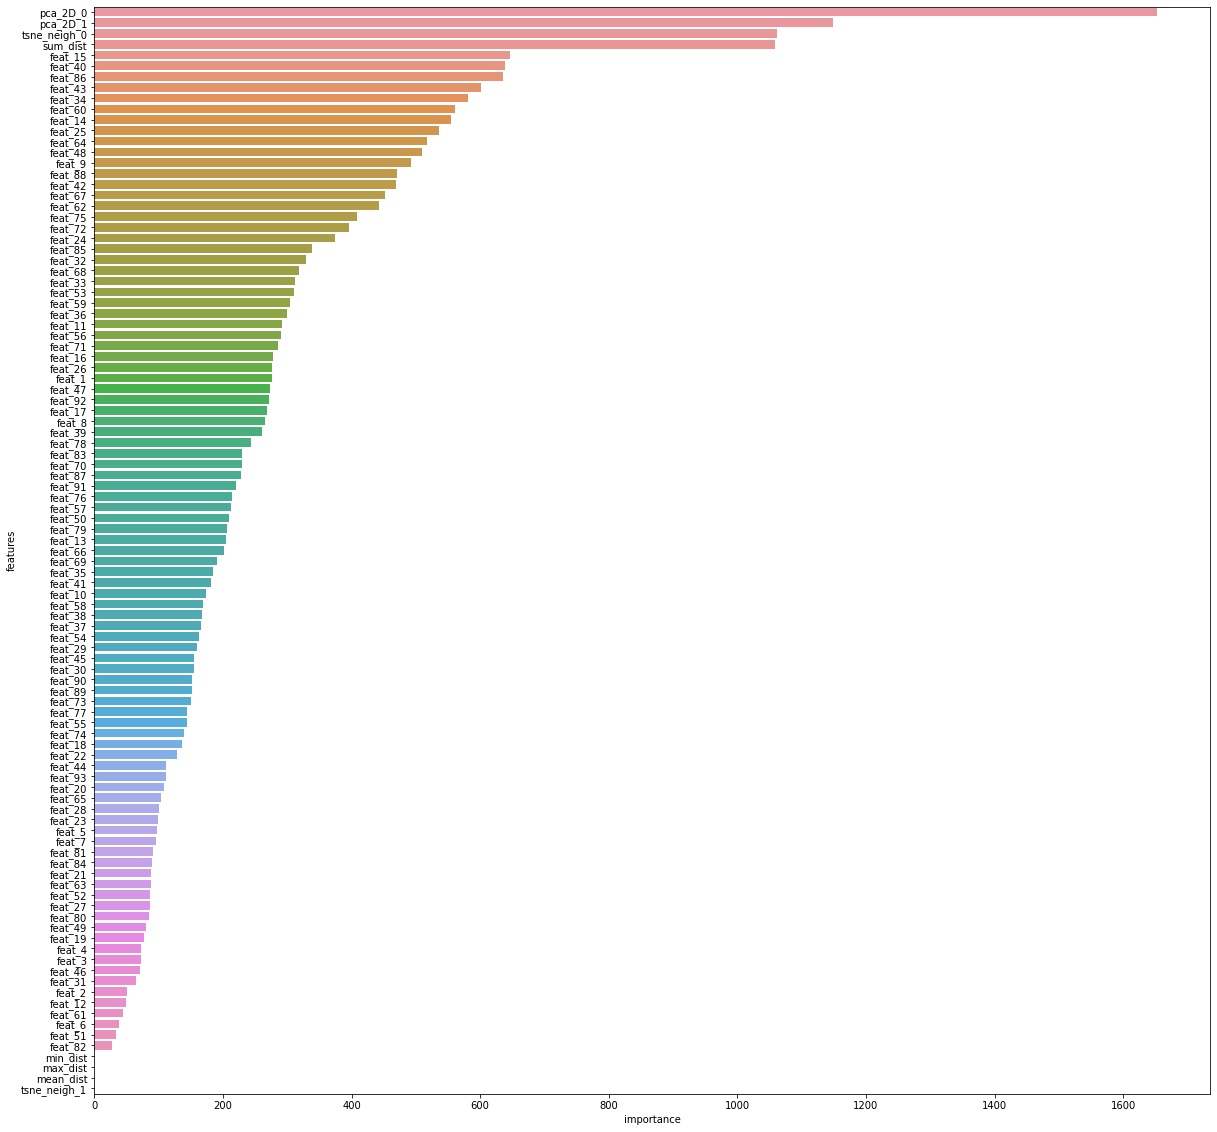

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

importance = pd.DataFrame()
importance["features"] = X_train.columns
importance["importance"] = model3.feature_importances_
importance = importance.sort_values("importance", ascending=False)

plt.figure(figsize=(20,20))
sns.barplot(x="importance", y="features", data=importance);